## Abstract

A small charter school network has rolled out coverage pay for the 2023-2024 school year due to staff shortages and to fiscally incentivize staff to cover classes and other duties in quarter 1, August, September, and October 2023.There are four types of coverage with their respective pay rates they are as follows:

    1. After School Program Tutoring : 80 USD
    2. Long Term Class Coverage: 39.59 USD 
    3. Short Term Class Coverage: 30 USD 
    4. Non-Instructional Coverage: 25 USD

## Objecitve

The following questions will guide the analysis:

1. What was the total amount of coverage pay received in Quarter 1?
2. What was the total amount of monthly coverage pay received in Quarter 1?
3. What was the total amount of coverage payreceive by each campus in Quarter 1?

In [3]:
#importing packages
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime as dt

In [4]:
#importing Q1 Coverage Pay dat 
df = pd.read_csv(r"C:\Users\togarro\Downloads\Coverage Tracker (Responses) - SQL Coverage Pay Dataset - Q1.csv", parse_dates = ['Date', 'Date of Coverage'] )

#Dropping columns 
df = df.drop(columns = ['Email Address', 'Supervisor','Coverage Approval','Approved/Unapproved'])


In [5]:
#Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 585 non-null    datetime64[ns]
 1   Name                 585 non-null    object        
 2   Employee No          585 non-null    int64         
 3   Date of Coverage     585 non-null    datetime64[ns]
 4   Type of Coverage     585 non-null    object        
 5   Campus               585 non-null    object        
 6   Number of Coverages  585 non-null    int64         
 7   Total Compensation   585 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 36.7+ KB


In [6]:
df.head()

,Date,Name,Employee No,Date of Coverage,Type of Coverage,Campus,Number of Coverages,Total Compensation
0,2023-08-28 16:13:18,Alice Lubrano,94,2023-08-28,Class coverage (long term),Elementary,5,197.95
1,2023-08-29 16:19:35,Alice Lubrano,94,2023-08-29,Class coverage (long term),Elementary,5,197.95
2,2023-08-30 15:51:50,Alice Lubrano,94,2023-08-30,Class coverage (long term),Elementary,5,197.95
3,2023-08-31 16:18:06,Alice Lubrano,94,2023-08-30,Class coverage (long term),Elementary,4,158.36
4,2023-09-01 15:49:20,Alice Lubrano,94,2023-09-01,Class coverage (long term),Elementary,5,197.95


In [7]:
#Dataset shape
df.shape

(585, 8)

In [8]:
#Creating Year Month Column
df['Year-Month'] = df['Date of Coverage'].dt.strftime("%Y-%m")

### 1. What was the total amount of coverage pay received in Quarter 1?

In [9]:
round(sum(df['Total Compensation']),2)

41699.71

In [10]:
sum(df['Number of Coverages'])

1024

In [11]:
#Distribution
distribution = df.groupby('Name')['Total Compensation'].sum()
distribution.describe()

count      72.000000
mean      579.162639
std       914.789774
min        25.000000
25%        30.000000
50%       150.000000
75%       636.885000
max      4180.000000
Name: Total Compensation, dtype: float64

In [12]:
#Coverage Type Count Totals
Coverage_Type_Total = df.groupby('Type of Coverage')['Number of Coverages'].sum().sort_values(ascending = False)
Coverage_Type_Total = pd.DataFrame(Coverage_Type_Total)

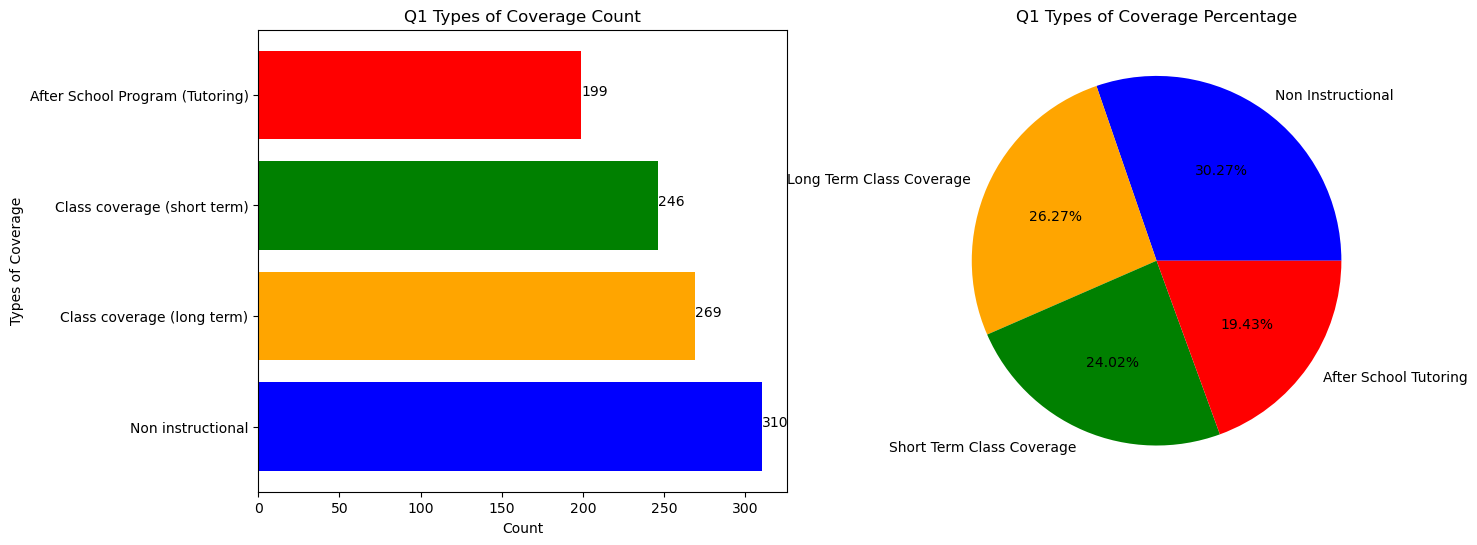

In [13]:
#Creating subplot figure 
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,6))
labels = ['Non Instructional','Long Term Class Coverage','Short Term Class Coverage','After School Tutoring' ]
colors = ['blue','orange','green','red']
#Plotting Coverage Type Count and Percentage Data
ax[0].barh(Coverage_Type_Total.index.values,Coverage_Type_Total['Number of Coverages'], color = colors)
ax[1].pie(Coverage_Type_Total['Number of Coverages'], autopct  = "%.2f%%", labels = labels,colors = colors)


#Labels
ax[0].set_ylabel('Types of Coverage')
ax[0].set_xlabel('Count')
ax[0].set_title('Q1 Types of Coverage Count')
ax[1].set_title('Q1 Types of Coverage Percentage')


for index,value in enumerate(Coverage_Type_Total['Number of Coverages']):
    ax[0].text(value, index,str(value))
    
plt.show()

In [14]:
#Coverage Type Compensation Totals
Coverage_Type_Compensation = df.groupby('Type of Coverage')['Total Compensation'].sum()
Coverage_Type_Compensation = pd.DataFrame(Coverage_Type_Compensation)

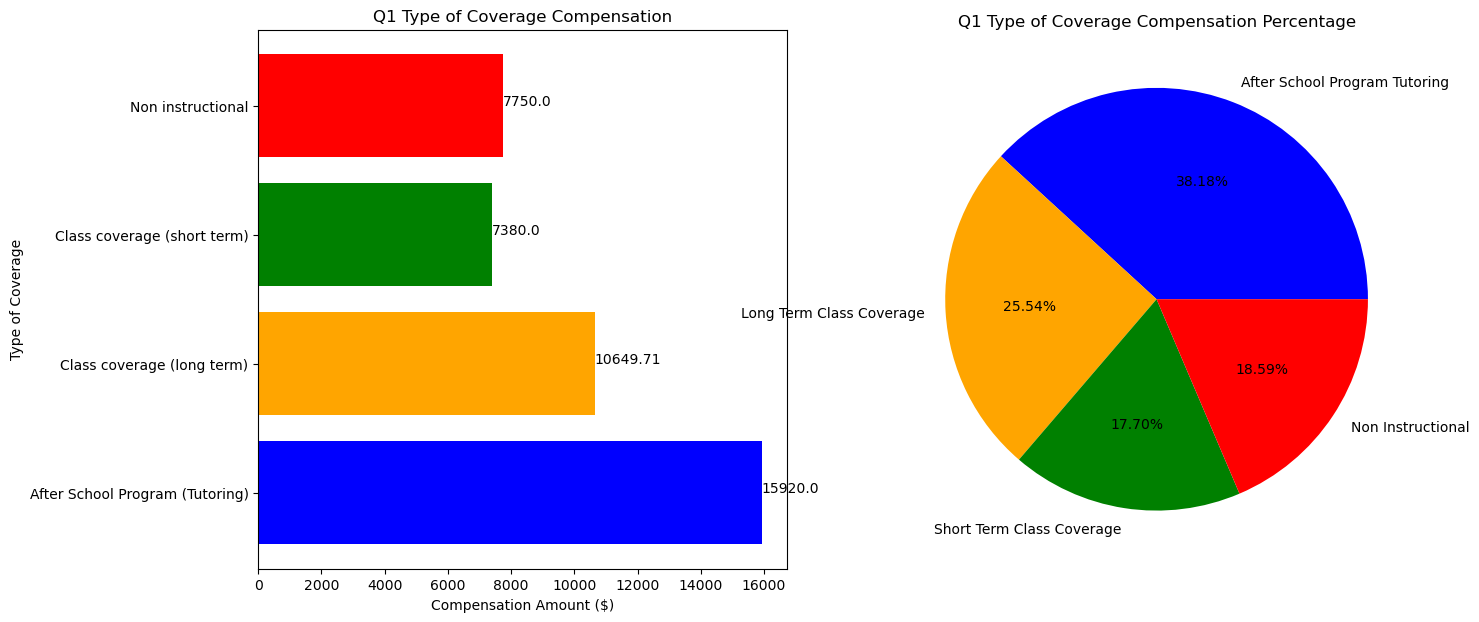

In [15]:
#Creatig subplot figure
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,7))
labels = ['After School Program Tutoring', 'Long Term Class Coverage', 'Short Term Class Coverage','Non Instructional']
colors1 = ['blue', 'orange','green','red']
#Plotting Coverage Type Compensation Data
ax[0].barh(Coverage_Type_Compensation.index.values,Coverage_Type_Compensation['Total Compensation'],color = colors1   )
ax[1].pie(Coverage_Type_Compensation['Total Compensation'], labels = labels, autopct = '%.2f%%',colors = colors1)

#Labels
ax[0].set_xlabel('Compensation Amount ($)')
ax[0].set_ylabel('Type of Coverage')
ax[0].set_title('Q1 Type of Coverage Compensation')
ax[1].set_title('Q1 Type of Coverage Compensation Percentage')

for index, value in enumerate (round(Coverage_Type_Compensation['Total Compensation'],2)):
    ax[0].text(value,index, str(value))

plt.show()


In total, 41,699.71 USD in coverage pay was received by staff in Q1, and there were 1,024 coverages in total. Non instructional coverages were the most frequent type of coverage, accounting for approximately 30 percent of all coverages submitted in Q1. However, After School Program Tutoring was the coverage with the highest compensation total of 15,920.00 USD, approximately 38 percent of all funds received for coverage in Q1.

### 2. What was the total amount of monthly coverage pay received in Quarter 1?

In [16]:
#Finding monthly coverage pay
Q1_monthly_pay = df.groupby('Year-Month')['Total Compensation'].sum()
Q1_monthly_pay = pd.DataFrame(Q1_monthly_pay)

#Renaming column
Q1_monthly_pay.rename(columns = {'Total Compensation': 'Monthly Coverage Pay'}, inplace = True)

In [17]:
#Month with the greatest amount of coverage pay
Q1_monthly_pay.sort_values(by = 'Monthly Coverage Pay', ascending = False).head(1)

,Monthly Coverage Pay
Year-Month,
2023-09,19752.52


September of 2023 was the month with the greatest total of coverage pay.

In [18]:
#Month with the least amount of coverage pay
Q1_monthly_pay.sort_values(by = 'Monthly Coverage Pay').head(1)

,Monthly Coverage Pay
Year-Month,
2023-08,5973.1


August of 2023 was the month with the lowest total of coverage pay.

In [19]:
#MoM Change Metrics 
Q1_monthly_pay['MoM Change'] = Q1_monthly_pay['Monthly Coverage Pay'].diff().fillna(0)
Q1_monthly_pay['MoM Change Pct'] = round(Q1_monthly_pay['Monthly Coverage Pay'].pct_change(),2).multiply(100).fillna(0)

Q1_monthly_pay

,Monthly Coverage Pay,MoM Change,MoM Change Pct
Year-Month,,,
2023-08,5973.10,0.00,0.0
2023-09,19752.52,13779.42,231.0
2023-10,15974.09,-3778.43,-19.0


In [20]:
#Average MoM Change and MoM Change Pct
round(Q1_monthly_pay[['MoM Change','MoM Change Pct']].mean(),2)

MoM Change        3333.66
MoM Change Pct      70.67
dtype: float64

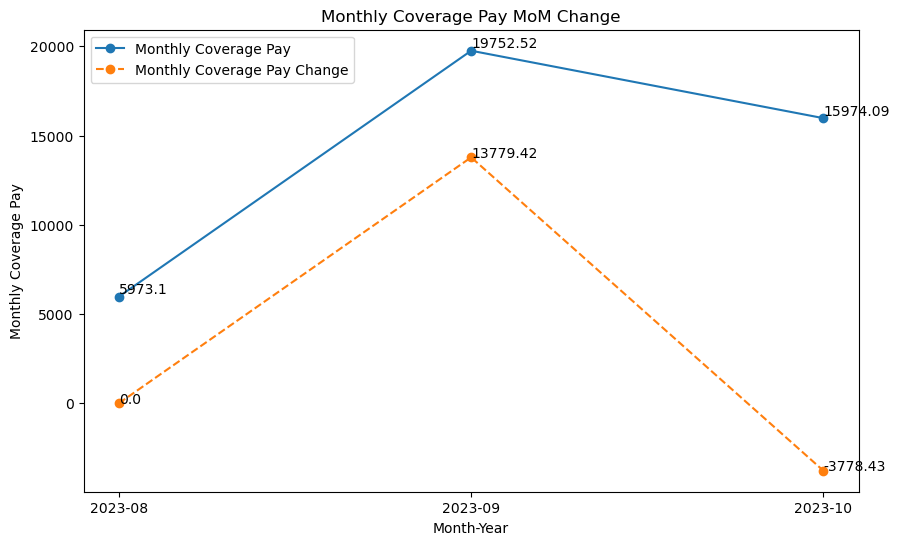

In [21]:
#Plotting MoM Coverage Pay Integer Data

#Figure size 
plt.figure(figsize = (10,6))

#Plotting Data
plt.plot(Q1_monthly_pay.index.values, Q1_monthly_pay['Monthly Coverage Pay'], marker  = 'o', label = 'Monthly Coverage Pay')
plt.plot(Q1_monthly_pay.index.values, Q1_monthly_pay['MoM Change'], linestyle = '--', marker = 'o', label =  'Monthly Coverage Pay Change')

#Data Visualization Labels 
plt.xlabel('Month-Year')
plt.ylabel('Monthly Coverage Pay')
plt.title('Monthly Coverage Pay MoM Change')
plt.legend()

#Marker Labels
for index, value in enumerate(Q1_monthly_pay['Monthly Coverage Pay']):
    plt.text(index, value, str(value), va = 'bottom', ha = 'left')

for index, value in enumerate(round(Q1_monthly_pay['MoM Change'],2)):
    plt.text(index, value, str(value))
    
#Displaying visulization
plt.show()

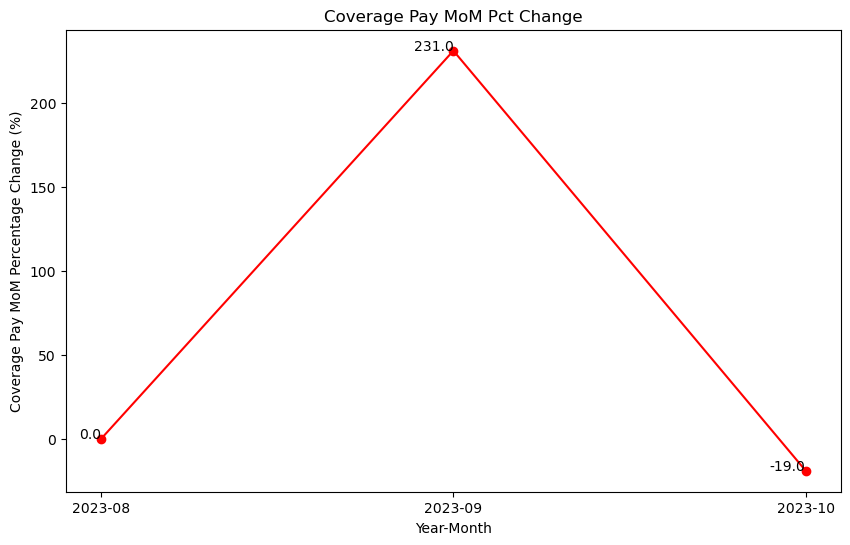

In [22]:
#Plotting MoM Percentage Data

#Figuresize 
plt.figure(figsize = (10,6))

#Plotting data 
plt.plot(Q1_monthly_pay.index.values, Q1_monthly_pay['MoM Change Pct'], marker = 'o', color = 'red')

#Labels
plt.xlabel('Year-Month')
plt.ylabel('Coverage Pay MoM Percentage Change (%)')
plt.title('Coverage Pay MoM Pct Change')

#Marker Labels
for index, value in enumerate (Q1_monthly_pay['MoM Change Pct']):
    plt.text(index, value, str(value), ha = 'right')
    
#Displaying data
plt.show()

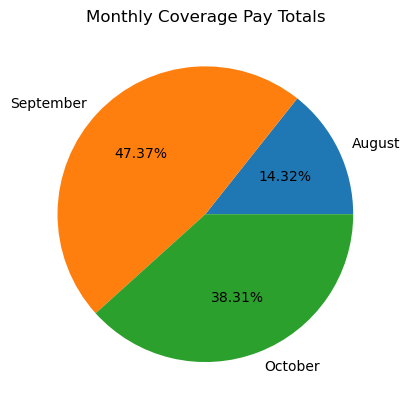

In [23]:
#Monthly Compensation Proportion Metrics
labels = ['August','September','October']
plt.pie(Q1_monthly_pay['Monthly Coverage Pay'], labels = labels, autopct = '%.2f%%')

#labels 
plt.title('Monthly Coverage Pay Totals')

plt.show()

September had the greatest total of coverage pay, totaling 19,752.52 USD and accounting for approximately 47 percent of the total coverage pay in Q1.August was the month with the lowest amount of coverage pay, totaling 5,973.10 USD, approximately 14 percent of the total coverage pay in Q1. Additionally, there is an upward trend in the amount of coverage pay total each month. On average there is an increase of 3,333.66 USD, 70.67%, per month.

### 3. What was the total amount of coverage pay received by each campus in Quarter 1?

In [24]:
# Q1 Campus Compensation Metrics
Campus_Compensation = df.groupby('Campus')['Total Compensation'].sum().sort_values(ascending = False)
Campus_Compensation = pd.DataFrame(Campus_Compensation)
Campus_Compensation.rename(columns = {'Total Compensation':'Campus Compensation'}, inplace = True)

In [27]:
Campus_Compensation

,Campus Compensation
Campus,
Elementary,21465.23
Collegiate,10944.89
Middle,9289.59


In [ ]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (15,5))
labels = ['Elementary', 'Collegiate', 'Middle']
colors2 = ['blue', 'orange', 'green']

#Plotting Data
ax[0].barh(Campus_Compensation.index.values,Campus_Compensation['Campus Compensation'], color = colors )
ax[1].pie(Campus_Compensation['Campus Compensation'], autopct = "%.2f%%", labels = labels, colors = colors )

#Labels
ax[0].set_xlabel('Compensation Amount ($)')
ax[0].set_ylabel('Campus')
ax[0].set_title ('Q1 Campus Compensation Total')
ax[1].set_title('Q1 Campus Compensation Total')

for index,value in enumerate(round(Campus_Compensation['Campus Compensation'],2)):
    ax[0].text(value, index, str(value))
    
plt.show()

In [ ]:
# Q1 Campus Coverage Total 
Campus_Coverages = df.groupby('Campus')['Number of Coverages'].sum().sort_values(ascending = False)
Campus_Coverages  = pd.DataFrame(Campus_Coverages)

In [ ]:
#Creating subplot figure
fig, ax = plt.subplots(nrows = 1 , ncols = 2, figsize = (15,5))
lables = ['Elementary', 'Collegiate', 'Middle']

#Plotting data
ax[0].barh(Campus_Coverages.index.values,Campus_Coverages['Number of Coverages'], color = colors)
ax[1].pie(Campus_Coverages['Number of Coverages'], autopct = "%.2f%%", labels = labels, colors = colors)

#Labels 
ax[0].set_xlabel('Coverage Count')
ax[0].set_ylabel('Campus')
ax[0].set_title('Q1 Campus Coverage Totals')
ax[1].set_title('Q1 Campus Coverage Totals Percentage')


for index,value in enumerate(Campus_Coverages['Number of Coverages']):
    ax[0].text(value, index, str(value))
    
#Displaying data
plt.show()

The Elementary Campus was the campus with the highest total of coverage pay in Q1, 21,465.23 USD, approximately 52 percent of total coverage pay compensation. Also, the Elementary Campus submitted the most  covergaes in Q1, 562, approximately 55 percent of all coverage submissions in Q1. The total coverges submitted by the Elementary Campus was 44 percent higher than the second highest campus, Collegiate, which submitted 316 coverages in Q1.

## Conclusion

In total there were 1,024 coverages totaling 41, 699.71 USD. The Elementary Campus had the greatest number of coverages, 562, as well as the greatest total of coverage pay.Also, the Elementary Campus had the largest concentration of employees with the total coverage pay compensation that were outliers.


Additionally, Non Instructional coverages was the most submitted type of coverage, accounting for approximtely 30 percent of all coverages submitted. However, the After School Tutoring Program coverage submissions was the most expensive type of coverage pay, 15,920 USD, accounting for approximately 38 percent.

Lastly, there is an upward trend in MoM Coverage Pay. On average there is an increase of 3,333.66 USD, 70.67%, per month.